군집 결과:
 2    62
1    50
0    38
Name: cluster, dtype: int64
실제 정답:
 Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64


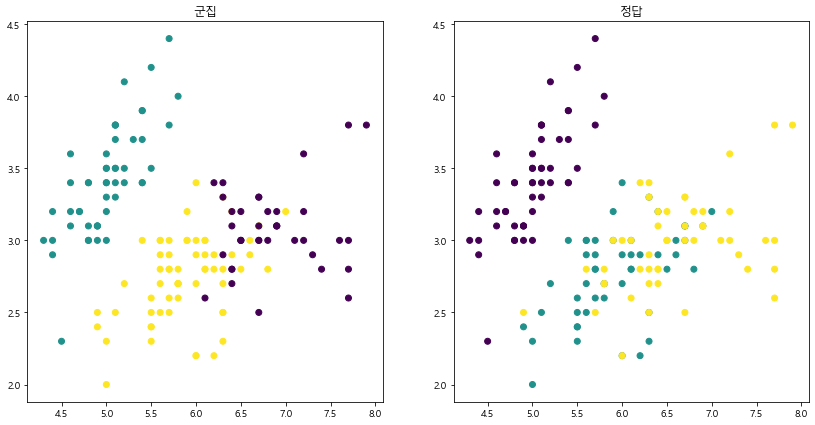

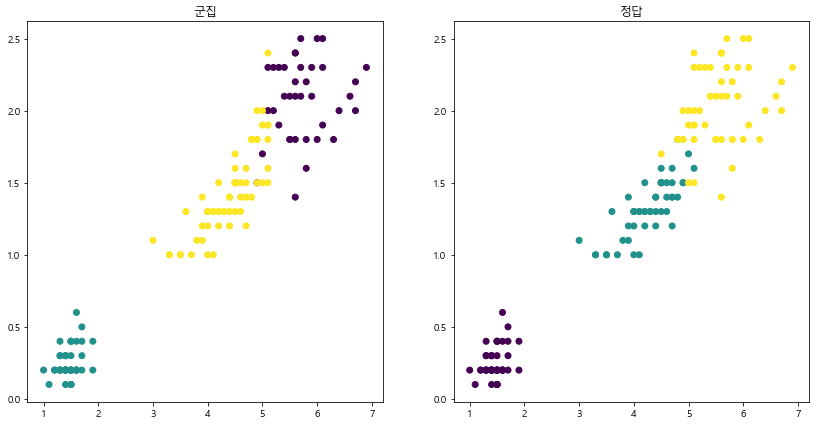

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('./Data/IRIS.csv')
# Label encoding
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['species'])
df['species_encode'] = encoded
# make train array
x_data = np.array(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y_data = np.array(df['species_encode'])
# clustering
model = KMeans(n_clusters=3)
model.fit(x_data)
df['cluster'] = model.labels_
center = model.cluster_centers_
# make plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'])
plt.title('군집')
plt.subplot(1,2,2)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species_encode'])
plt.title('정답')

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster'])
plt.title('군집')
plt.subplot(1,2,2)
plt.scatter(df['petal_length'], df['petal_width'], c=df['species_encode'])
plt.title('정답')

cg_cluster = df['cluster'].value_counts()
cg_real = df['species'].value_counts()
print('군집 결과:\n', cg_cluster)
print('실제 정답:\n', cg_real)

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
# df['cluster']
print('실루엣 평균: ', silhouette_score(x_data, df['cluster']))
silhouette_samples(x_data, df['cluster'])



실루엣 평균:  0.5525919445499757


array([0.85157298, 0.817887  , 0.83008729, 0.8065908 , 0.84699565,
       0.74628444, 0.8210796 , 0.85340748, 0.75384818, 0.82895302,
       0.80150542, 0.83563957, 0.81325176, 0.74707696, 0.70091086,
       0.64149392, 0.77354754, 0.84964579, 0.70548523, 0.8178354 ,
       0.78413148, 0.8237893 , 0.79157875, 0.79422255, 0.77521625,
       0.80130908, 0.8329435 , 0.84096492, 0.84314169, 0.81915866,
       0.81735915, 0.79854746, 0.76017812, 0.71993736, 0.82895302,
       0.83285788, 0.79335138, 0.82895302, 0.7698255 , 0.84989778,
       0.84788216, 0.6413782 , 0.78707116, 0.7991425 , 0.74523195,
       0.81162359, 0.81106264, 0.8198735 , 0.81643527, 0.85237895,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26365142, 0.34419223, 0.57829491,
       0.3733641 , 0.58710354, 0.55107857, 0.48216686, 0.56268236,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

정답: 
 Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

군집: 
 2    62
0    50
1    38
Name: cluster, dtype: int64

예측: 
 2    52
0    50
1    48
Name: pred, dtype: int64


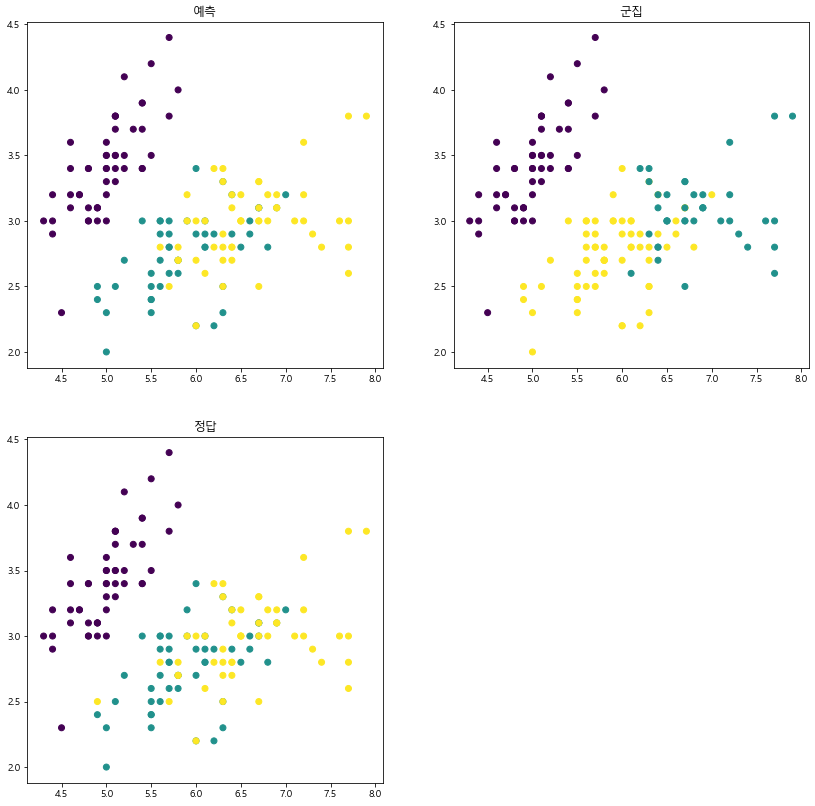

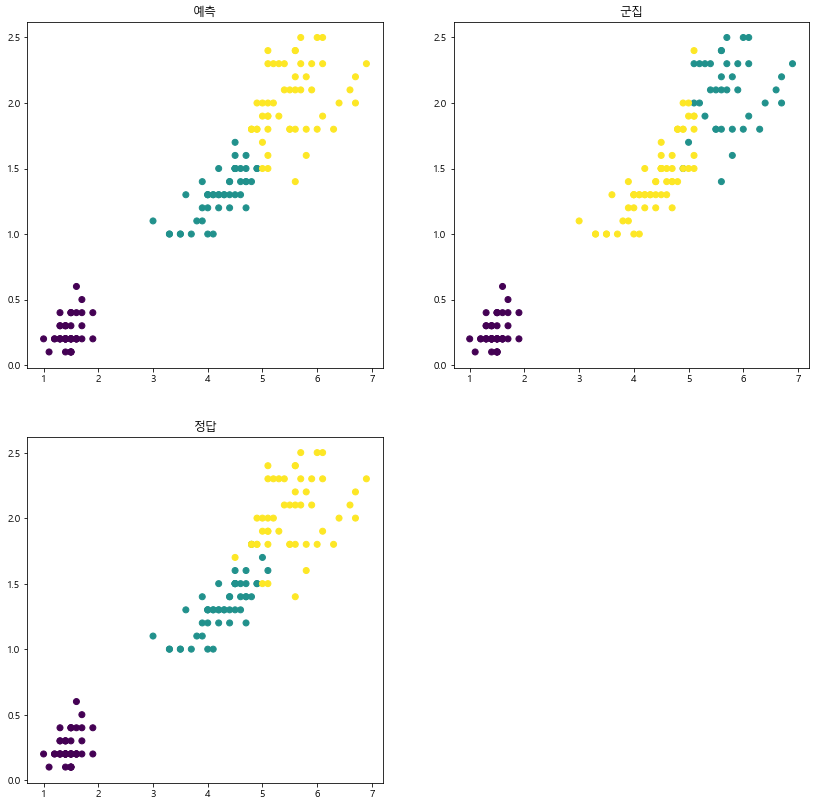

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 데이터 분리(실행시마다 결과를 고정하기 위해 random_state 시드를 아무 숫자나 줌)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2)
# 모델 생성
model = LogisticRegression()
model.fit(x_train, y_train)
# 예측값 데이터프레임에 넣기
df['pred'] = model.predict(x_data)
# 정확도 (x_test 넣어서 예측한 값 / y_test 실제 정답)
model.score(x_test, y_test)

# 그래프로 시각화
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['pred'])
plt.title('예측')
plt.subplot(2,2,2)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'])
plt.title('군집')
plt.subplot(2,2,3)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species_encode'])
plt.title('정답')

plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.scatter(df['petal_length'], df['petal_width'], c=df['pred'])
plt.title('예측')
plt.subplot(2,2,2)
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster'])
plt.title('군집')
plt.subplot(2,2,3)
plt.scatter(df['petal_length'], df['petal_width'], c=df['species_encode'])
plt.title('정답')

# 각 값을 통계해보기
category_real = df['species'].value_counts()
category_cluster = df['cluster'].value_counts()
category_predict = df['pred'].value_counts()
print('정답: \n', category_real)
print('\n군집: \n', category_cluster)
print('\n예측: \n', category_predict)

# plt.figure(figsize=(6,6))
# my_list = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
# for species in my_list:
#     plt.scatter(df[df['species'] == species]['petal_length'],df[df['species'] == species]['petal_width'], label=species)
# plt.legend()

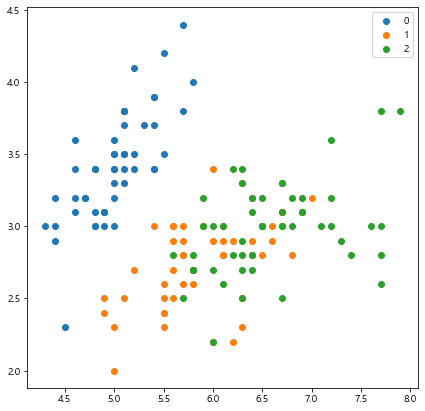

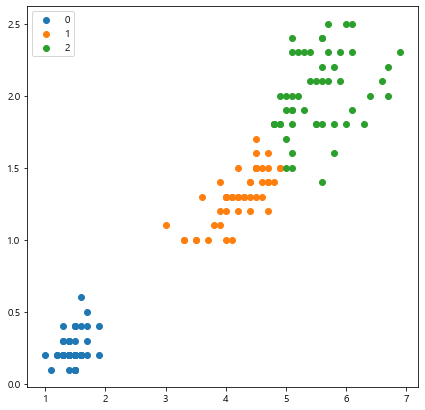

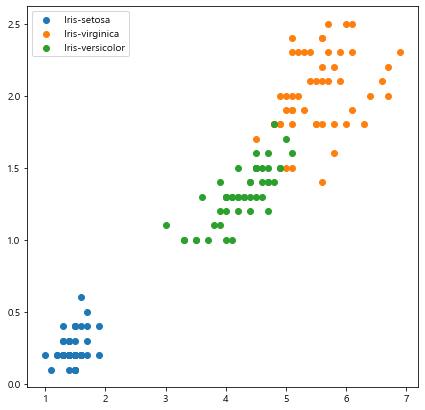

<Figure size 432x288 with 0 Axes>

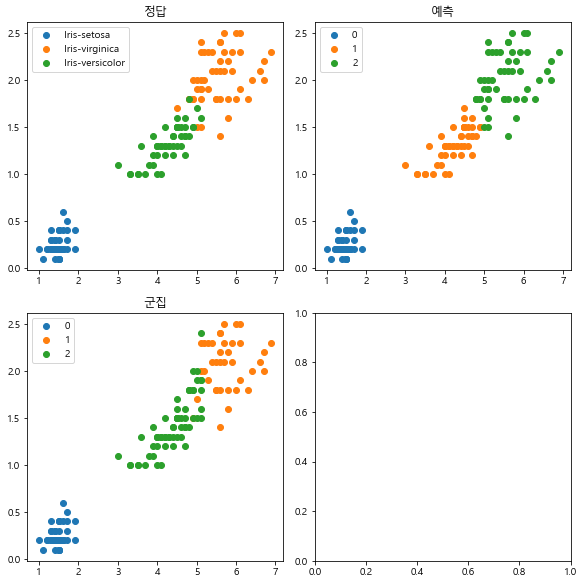

In [36]:
df[df['pred'] == 0]['sepal_width']
df[df['pred'] == 0]['sepal_length']

# plt.figure(figsize=(7,7))
# plt.scatter(df[df['pred'] == 0]['sepal_length'], df[df['pred'] == 0]['sepal_width'], label=0)
# plt.scatter(df[df['pred'] == 1]['sepal_length'], df[df['pred'] == 1]['sepal_width'], label=1)
# plt.scatter(df[df['pred'] == 2]['sepal_length'], df[df['pred'] == 2]['sepal_width'], label=2)
# plt.legend()

plt.figure(figsize=(7,7))
for i in range(0, 3):
    plt.scatter(df[df['pred'] == i]['sepal_length'], df[df['pred'] == i]['sepal_width'], label=i)
plt.legend()

plt.figure(figsize=(7,7))
for i in range(0, 3):
    plt.scatter(df[df['pred'] == i]['petal_length'], df[df['pred'] == i]['petal_width'], label=i)
plt.legend()

my_list = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plt.figure(figsize=(7,7))
for k in my_list:
    plt.scatter(df[df['species'] == k]['petal_length'], df[df['species'] == k]['petal_width'], label=k)
plt.legend()

fig = plt.figure()
fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
for k in my_list:
    ax[0][0].scatter(df[df['species'] == k]['petal_length'], df[df['species'] == k]['petal_width'], label=k)
ax[0][0].set_title('정답')
ax[0][0].legend()
for i in range(0, 3):
    ax[0][1].scatter(df[df['pred'] == i]['petal_length'], df[df['pred'] == i]['petal_width'], label=i)
ax[0][1].set_title('예측')
ax[0][1].legend()
for i in range(0, 3):
    ax[1][0].scatter(df[df['cluster'] == i]['petal_length'], df[df['cluster'] == i]['petal_width'], label=i)
ax[1][0].set_title('군집')
ax[1][0].legend()